In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read CSV to make initial df
df_ufo = pd.read_csv('final_data.csv')
df_ufo

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted
0,1,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,29.883056,-97.941111,2004-04-27
1,2,1956-10-10 21:00:00,edna,tx,us,circle,20.0,28.978333,-96.645833,2004-01-17
2,3,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,21.418056,-157.803611,2004-01-22
3,4,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,36.595000,-82.188889,2007-04-27
4,5,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,41.117500,-73.408333,1999-10-02
...,...,...,...,...,...,...,...,...,...,...
65109,65110,2013-09-09 21:15:00,nashville,tn,us,light,600.0,36.165833,-86.784444,2013-09-30
65110,65111,2013-09-09 22:00:00,boise,id,us,circle,1200.0,43.613611,-116.202500,2013-09-30
65111,65112,2013-09-09 22:00:00,napa,ca,us,other,1200.0,38.297222,-122.284444,2013-09-30
65112,65113,2013-09-09 22:20:00,vienna,va,us,circle,5.0,38.901111,-77.265556,2013-09-30


In [4]:
# Check datatypes.
df_ufo.dtypes

ID                    int64
datetime             object
city                 object
state                object
country              object
shape                object
duration_seconds    float64
latitude            float64
longitude           float64
date_posted          object
dtype: object

In [5]:
# Fix datatypes.
df_ufo['datetime'] = pd.to_datetime(df_ufo['datetime'])
df_ufo['date_posted'] = pd.to_datetime(df_ufo['date_posted'])

In [6]:
# Check datatypes again.
df_ufo.dtypes

ID                           int64
datetime            datetime64[ns]
city                        object
state                       object
country                     object
shape                       object
duration_seconds           float64
latitude                   float64
longitude                  float64
date_posted         datetime64[ns]
dtype: object

In [7]:
# Find the average and median duration of observations.
average_duration = df_ufo["duration_seconds"].mean()
median_duration = df_ufo["duration_seconds"].median()
print(f"Average duration: {average_duration} seconds")
print(f"Median duration: {median_duration} seconds")

Average duration: 5800.014047363085 seconds
Median duration: 180.0 seconds


In [8]:
# Sort values by longest and shortest durations.
longest_obs = df_ufo.sort_values(by=["duration_seconds"], ascending=False)
display(longest_obs.head())

shortest_obs = df_ufo.sort_values(by=["duration_seconds"], ascending=True)
display(shortest_obs.head())

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted
60480,60481,1991-09-15 18:00:00,greenbrier,ar,us,light,66276000.0,35.233889,-92.387500,2008-03-31
52325,52326,2012-08-10 21:00:00,finley,wa,us,light,52623200.0,46.154167,-119.032778,2012-08-19
56117,56118,2002-08-24 01:00:00,englewood,fl,us,light,52623200.0,26.961667,-82.352778,2002-08-28
57680,57681,2008-08-03 21:00:00,virginia beach,va,us,fireball,10526400.0,36.852778,-75.978333,2008-08-12
25229,25230,1994-03-01 01:00:00,menifee,ca,us,unknown,10526400.0,33.728333,-117.145556,2005-02-22


,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted
34792,34793,1987-05-15 23:00:00,island lake,il,us,light,0.01,42.276111,-88.191944,2012-01-12
46079,46080,1974-07-15 22:00:00,bridgeview,il,us,triangle,0.01,41.750000,-87.804167,2004-01-17
19658,19659,1999-12-09 18:15:00,lyle,wa,us,fireball,0.01,45.696111,-121.285000,1999-12-16
57057,57058,2002-08-29 23:45:00,toledo,or,us,triangle,0.01,44.621667,-123.937222,2002-09-06
11158,11159,2001-11-28 03:41:00,milwaukie,or,us,fireball,0.02,45.446389,-122.638056,2001-12-05


In [9]:
# Create a new year column for grouping
df_ufo['year'] = df_ufo['datetime'].dt.year

In [10]:
# Group by year and find out which years had the most sightings.
most_active_years = df_ufo.groupby('year').count()
most_active_years = most_active_years["ID"]
most_active_years = most_active_years.sort_values(ascending=False)
display(most_active_years.head(10))


year
2012    6322
2013    6054
2011    4379
2008    4017
2009    3677
2010    3548
2007    3470
2004    3244
2005    3228
2003    2958
Name: ID, dtype: int64

In [11]:
# Group by year and find out which years had the least sightings.
least_active_years = df_ufo.groupby('year').count()
least_active_years = least_active_years["ID"]
least_active_years = least_active_years.sort_values(ascending=True)
display(least_active_years.head(10))

year
1920    1
1925    1
1929    1
1934    1
1936    1
1941    1
1943    1
1910    2
1931    2
1937    2
Name: ID, dtype: int64

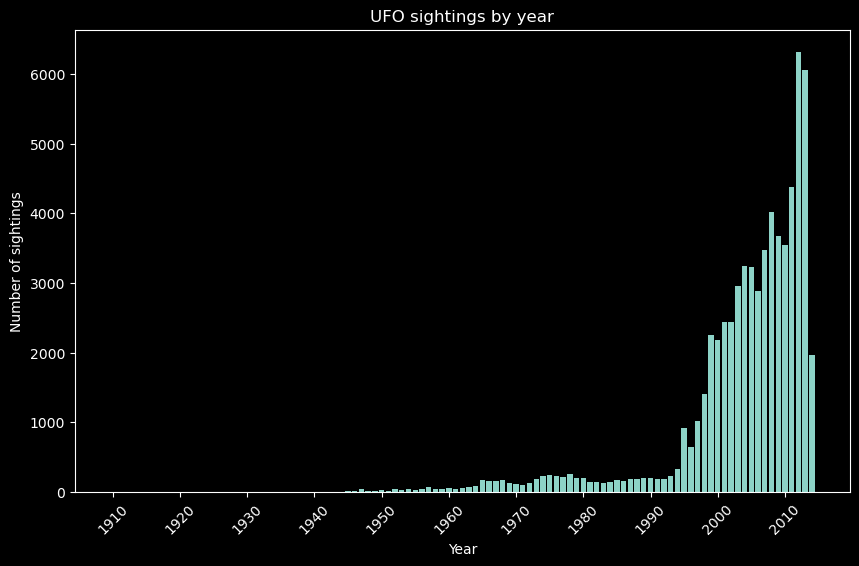

In [12]:
# Graph the sightings by year
sightings_by_year = df_ufo.groupby('year').count()
sightings_by_year = sightings_by_year["ID"]

# Create the plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(sightings_by_year.index, sightings_by_year.values)

# Customize x-axis ticks to show only every decade
plt.xticks(range(sightings_by_year.index[0], sightings_by_year.index[-1] + 1, 10), \
           range(sightings_by_year.index[0], sightings_by_year.index[-1] + 1, 10), rotation=45)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of sightings')
plt.title('UFO sightings by year')

# Show the plot
plt.show()

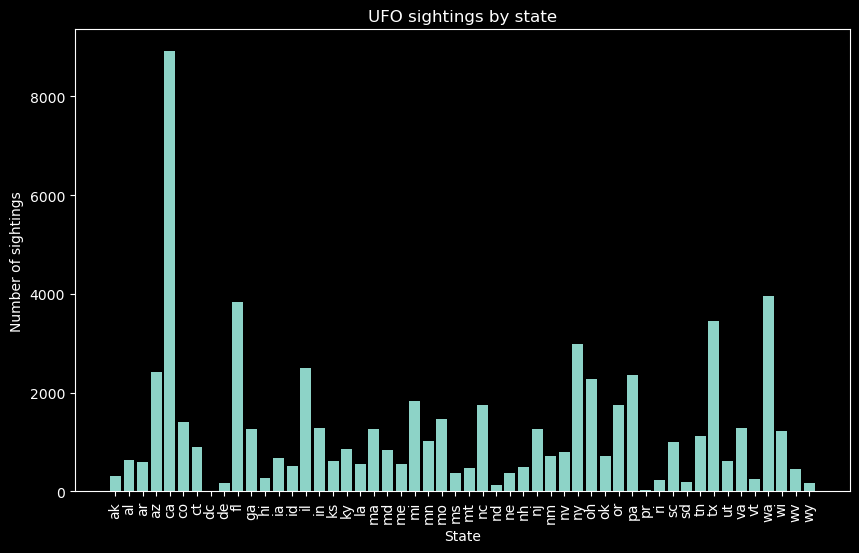

In [13]:
# Graph the sightings by state
sightings_by_state = df_ufo.groupby('state').count()
sightings_by_state = sightings_by_state["ID"]

# Create the plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(sightings_by_state.index, sightings_by_state.values)

# Customize x-axis ticks to show only every decade
plt.xticks(rotation = 90)

# Set labels and title
plt.xlabel('State')
plt.ylabel('Number of sightings')
plt.title('UFO sightings by state')

# Show the plot
plt.show()

In [14]:
# Top cities for UFO sightings
sightings_by_city = df_ufo.groupby("city").count()
sightings_by_city = sightings_by_city["ID"].sort_values(ascending=False)
sightings_by_city.head(10)

city
seattle        524
phoenix        454
portland       373
las vegas      367
los angeles    352
san diego      338
houston        297
chicago        264
tucson         241
miami          239
Name: ID, dtype: int64

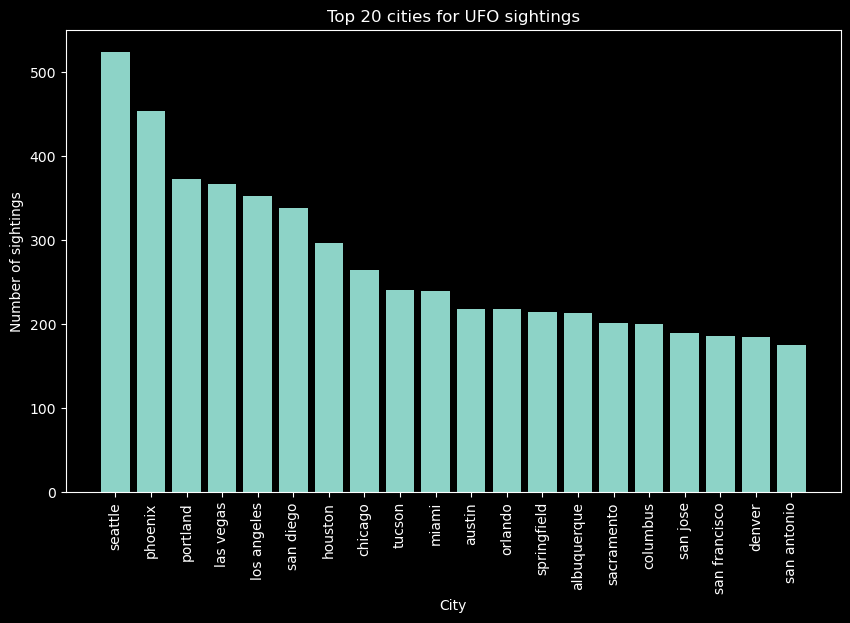

In [15]:
# Graph top 20 cities for UFO sightings

# Create the plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(sightings_by_city.index[:20], sightings_by_city.values[:20])

# Customize x-axis ticks to show only every decade
plt.xticks(rotation = 90)

# Set labels and title
plt.xlabel('City')
plt.ylabel('Number of sightings')
plt.title('Top 20 cities for UFO sightings')

# Show the plot
plt.show()

In [16]:
# Top shapes spotted in UFO sightings
sightings_by_shape = df_ufo.groupby("shape").count()
sightings_by_shape = sightings_by_shape["ID"].sort_values(ascending=False)
sightings_by_shape.head(10)

shape
light        13473
triangle      6549
circle        6118
fireball      5148
unknown       4567
other         4466
sphere        4347
disk          4121
oval          3032
formation     1990
Name: ID, dtype: int64

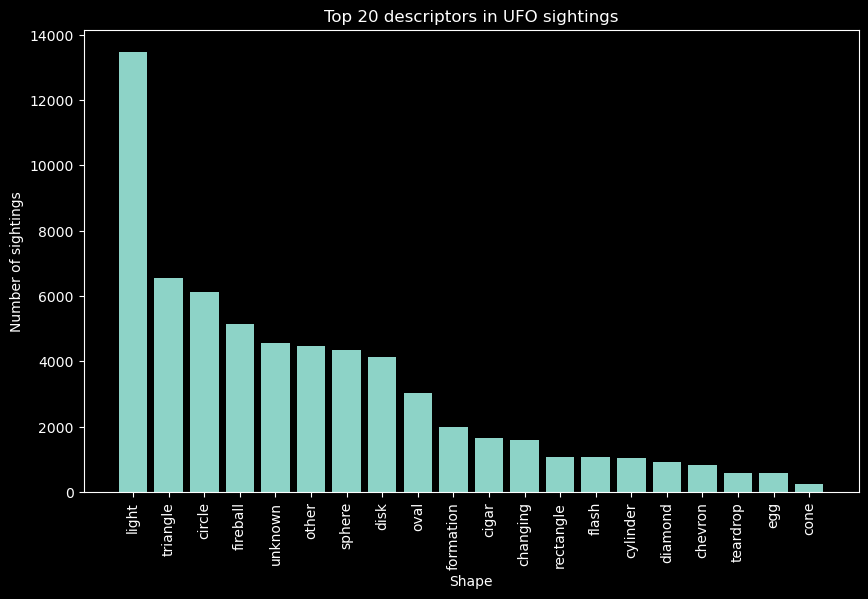

In [17]:
# Graph top 20 shapes for UFO sightings

# Create the plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(sightings_by_shape.index[:20], sightings_by_shape.values[:20])

# Customize x-axis ticks to show only every decade
plt.xticks(rotation = 90)

# Set labels and title
plt.xlabel('Shape')
plt.ylabel('Number of sightings')
plt.title('Top 20 descriptors in UFO sightings')

# Show the plot
plt.show()

In [18]:
# Find specifically Roswell data.

roswell_sightings = df_ufo.loc[(df_ufo['city'] == 'roswell') & (df_ufo['state'] == 'nm')].sort_values(by="datetime", ascending=True).reset_index()
roswell_count = roswell_sightings["ID"].count()
print(roswell_count)
display(roswell_sightings.head(roswell_count))


27


,index,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year
0,15163,15164,1945-12-15 02:00:00,roswell,nm,us,sphere,60.0,33.394167,-104.5225,2002-12-23,1945
1,44711,44712,1947-07-11 23:59:00,roswell,nm,us,NaN,2400.0,33.394167,-104.5225,2004-06-18,1947
2,39690,39691,1953-06-15 23:59:00,roswell,nm,us,NaN,14400.0,33.394167,-104.5225,2001-02-18,1953
3,53693,53694,1959-08-15 15:00:00,roswell,nm,us,unknown,2700.0,33.394167,-104.5225,2006-12-07,1959
4,38828,38829,1989-06-01 23:00:00,roswell,nm,us,NaN,14400.0,33.394167,-104.5225,2011-01-05,1989
5,26021,26022,1998-03-15 00:00:00,roswell,nm,us,triangle,60.0,33.394167,-104.5225,2009-04-14,1998
6,59170,59171,1998-09-11 00:00:00,roswell,nm,us,diamond,5.0,33.394167,-104.5225,1998-09-26,1998
7,18930,18931,2000-12-06 18:16:00,roswell,nm,us,triangle,360.0,33.394167,-104.5225,2002-01-11,2000
8,46991,46992,2001-07-18 21:00:00,roswell,nm,us,chevron,120.0,33.394167,-104.5225,2001-08-05,2001
9,54028,54029,2001-08-15 22:00:00,roswell,nm,us,triangle,240.0,33.394167,-104.5225,2003-10-31,2001


In [19]:
# Manipulate the Roswell settings a bit to make it a cleaner dataframe.
roswell_sightings = roswell_sightings[["ID", "datetime", "shape", "duration_seconds", "city", "state"]]
roswell_sightings = roswell_sightings.sort_values(by="datetime", ascending=False)
roswell_sightings.head(12)

,ID,datetime,shape,duration_seconds,city,state
26,13556,2012-11-08 22:30:00,flash,3600.0,roswell,nm
25,12847,2011-01-16 14:30:00,egg,3.0,roswell,nm
24,58098,2009-08-05 20:45:00,light,35.0,roswell,nm
23,38206,2009-06-10 21:10:00,sphere,30.0,roswell,nm
22,60685,2008-09-15 18:30:00,changing,2700.0,roswell,nm
21,58880,2008-08-09 19:03:00,light,180.0,roswell,nm
20,57884,2008-08-04 21:53:00,unknown,6.0,roswell,nm
19,64334,2007-09-05 23:55:00,changing,15.0,roswell,nm
18,20469,2006-01-05 18:45:00,flash,1.0,roswell,nm
17,50160,2005-07-04 11:00:00,disk,5.0,roswell,nm


In [20]:
# Create a column to represent the time disparity between datetime and date_posted
disparity_df = df_ufo
disparity_df["time_disparity"] = disparity_df["date_posted"] - disparity_df["datetime"]
disparity_df = disparity_df.sort_values(by=["time_disparity"], ascending=True)
disparity_df

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year,time_disparity
27051,27052,1999-03-02 19:04:00,miami beach,fl,us,circle,30.0,25.790278,-80.130278,1999-02-16,1999,-15 days +04:56:00
20065,20066,2011-01-31 23:59:00,downingtown,pa,us,circle,262.0,40.006389,-75.703611,2011-01-31,2011,-1 days +00:01:00
58445,58446,2007-08-07 23:45:00,martinsburg,wv,us,cigar,420.0,39.456111,-77.964167,2007-08-07,2007,-1 days +00:15:00
18567,18568,2012-01-24 23:45:00,st. augustine,fl,us,light,4.0,29.894444,-81.314722,2012-01-24,2012,-1 days +00:15:00
62986,62987,1998-09-26 23:30:00,steilacoom,wa,us,fireball,2700.0,47.170000,-122.601389,1998-09-26,1998,-1 days +00:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...
38376,38377,1939-06-01 20:00:00,waterloo,al,us,fireball,300.0,34.918056,-88.064167,2014-02-21,1939,27293 days 04:00:00
17360,17361,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,41.420833,-90.015000,2005-05-11,1925,28988 days 06:00:00
38247,38248,1920-06-11 21:00:00,cicero,in,us,unknown,60.0,40.123889,-86.013333,2009-05-12,1920,32476 days 03:00:00
38374,38375,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,32.709167,-96.008056,2005-04-16,1910,34652 days 09:00:00


Mean duration: 5800.014047363086


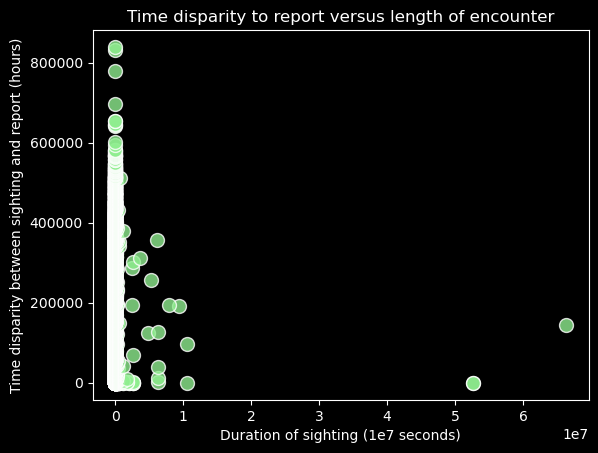

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year,time_disparity
60480,60481,1991-09-15 18:00:00,greenbrier,ar,us,light,66276000.00,35.233889,-92.387500,2008-03-31,1991,6041 days 06:00:00
52325,52326,2012-08-10 21:00:00,finley,wa,us,light,52623200.00,46.154167,-119.032778,2012-08-19,2012,8 days 03:00:00
56117,56118,2002-08-24 01:00:00,englewood,fl,us,light,52623200.00,26.961667,-82.352778,2002-08-28,2002,3 days 23:00:00
57680,57681,2008-08-03 21:00:00,virginia beach,va,us,fireball,10526400.00,36.852778,-75.978333,2008-08-12,2008,8 days 03:00:00
25229,25230,1994-03-01 01:00:00,menifee,ca,us,unknown,10526400.00,33.728333,-117.145556,2005-02-22,1994,4010 days 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
11158,11159,2001-11-28 03:41:00,milwaukie,or,us,fireball,0.02,45.446389,-122.638056,2001-12-05,2001,6 days 20:19:00
46079,46080,1974-07-15 22:00:00,bridgeview,il,us,triangle,0.01,41.750000,-87.804167,2004-01-17,1974,10777 days 02:00:00
34792,34793,1987-05-15 23:00:00,island lake,il,us,light,0.01,42.276111,-88.191944,2012-01-12,1987,9007 days 01:00:00
57057,57058,2002-08-29 23:45:00,toledo,or,us,triangle,0.01,44.621667,-123.937222,2002-09-06,2002,7 days 00:15:00


In [21]:
# Graph duration against the disparity, just to see if anything interesting comes up.
duration_mean = disparity_df["duration_seconds"].mean()
print(f"Mean duration: {duration_mean}")

disparity_graph = plt.scatter(disparity_df["duration_seconds"], (disparity_df["time_disparity"].dt.total_seconds() / 3600), marker='o', edgecolor="white", color='lightgreen', s=100, alpha=0.8)
plt.title("Time disparity to report versus length of encounter")
plt.ylabel("Time disparity between sighting and report (hours)")
plt.xlabel("Duration of sighting (1e7 seconds)")
plt.show()

# Note that there are two outstanding anomalies throwing the data on duration. Consider trying to remove those from the data.
# According to longest_obs, the outliers are IDs 60481, 52326, 56118

disparity_df = disparity_df.sort_values(by=["duration_seconds"], ascending=False)
disparity_df

Mean duration: 3165.9737168834754


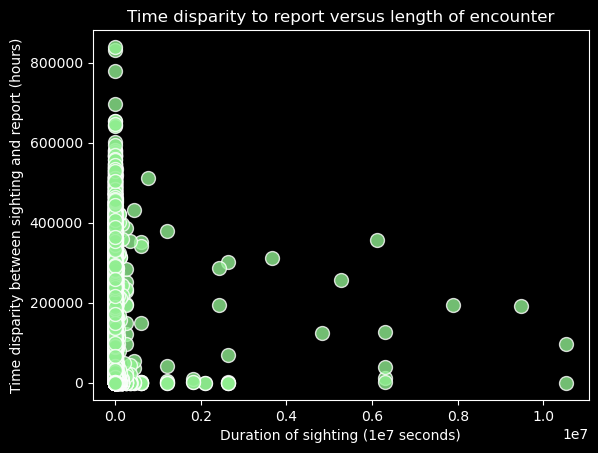

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year,time_disparity
19658,19659,1999-12-09 18:15:00,lyle,wa,us,fireball,0.01,45.696111,-121.285000,1999-12-16,1999,6 days 05:45:00
46079,46080,1974-07-15 22:00:00,bridgeview,il,us,triangle,0.01,41.750000,-87.804167,2004-01-17,1974,10777 days 02:00:00
57057,57058,2002-08-29 23:45:00,toledo,or,us,triangle,0.01,44.621667,-123.937222,2002-09-06,2002,7 days 00:15:00
34792,34793,1987-05-15 23:00:00,island lake,il,us,light,0.01,42.276111,-88.191944,2012-01-12,1987,9007 days 01:00:00
11158,11159,2001-11-28 03:41:00,milwaukie,or,us,fireball,0.02,45.446389,-122.638056,2001-12-05,2001,6 days 20:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...
40324,40325,2012-06-15 21:00:00,huntington,ny,us,light,6312000.00,40.868056,-73.426111,2013-10-14,2012,485 days 03:00:00
25969,25970,1984-03-15 20:00:00,griffin,ga,us,circle,7894800.00,33.246667,-84.264167,2006-05-15,1984,8095 days 04:00:00
9090,9091,1977-01-01 02:30:00,new canaan,ct,us,NaN,9468000.00,41.146667,-73.495278,1998-11-19,1977,7991 days 21:30:00
25229,25230,1994-03-01 01:00:00,menifee,ca,us,unknown,10526400.00,33.728333,-117.145556,2005-02-22,1994,4010 days 23:00:00


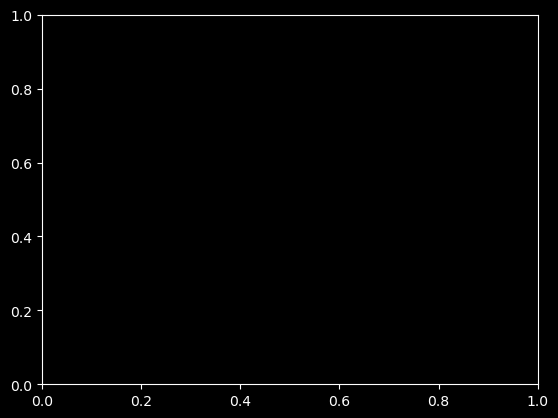

In [22]:
# Drop the outliers in duration and graph again.
disparity_df = disparity_df.drop(disparity_df[disparity_df['ID'] == 60481].index)
disparity_df = disparity_df.drop(disparity_df[disparity_df['ID'] == 52326].index)
disparity_df = disparity_df.drop(disparity_df[disparity_df['ID'] == 56118].index)

new_duration_mean = disparity_df["duration_seconds"].mean()
print(f"Mean duration: {new_duration_mean}")

disparity_graph = plt.scatter(disparity_df["duration_seconds"], (disparity_df["time_disparity"].dt.total_seconds() / 3600), marker='o', edgecolor="white", color='lightgreen', s=100, alpha=0.8)
plt.title("Time disparity to report versus length of encounter")
plt.ylabel("Time disparity between sighting and report (hours)")
plt.xlabel("Duration of sighting (1e7 seconds)")
plt.show()

# Adjust the x-axis label format
plt.ticklabel_format(style='plain', axis='x')

disparity_df = disparity_df.sort_values(by=["duration_seconds"], ascending=True)
disparity_df

In [23]:
# Trying to find a specific encounter.

march94 = df_ufo.loc[(df_ufo["datetime"].dt.month == 3) & (df_ufo["datetime"].dt.year == 1994)].sort_values(by="datetime", ascending=True)
march94

,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year,time_disparity
25229,25230,1994-03-01 01:00:00,menifee,ca,us,unknown,10526400.0,33.728333,-117.145556,2005-02-22,1994,4010 days 23:00:00
27047,27048,1994-03-02 23:15:00,lindsborg,ks,us,triangle,10.0,38.573611,-97.674167,2006-07-16,1994,4518 days 00:45:00
28416,28417,1994-03-03 00:00:00,albany,ny,us,rectangle,21600.0,42.652500,-73.756667,2012-04-18,1994,6621 days 00:00:00
28417,28418,1994-03-03 23:00:00,moab (south of),ut,us,triangle,60.0,38.573333,-109.549167,2001-08-05,1994,2711 days 01:00:00
29065,29066,1994-03-08 19:15:00,seattle (university district),wa,us,fireball,5.0,47.606389,-122.330833,2007-02-01,1994,4712 days 04:45:00
29191,29192,1994-03-09 21:00:00,canton,mi,us,unknown,120.0,42.308611,-83.482222,2007-04-27,1994,4796 days 03:00:00
24896,24897,1994-03-10 18:00:00,whittier,ca,us,circle,300.0,33.979167,-118.031944,2000-07-11,1994,2314 days 06:00:00
24897,24898,1994-03-10 18:00:00,wyoming,mi,us,disk,60.0,42.913333,-85.705278,2006-05-15,1994,4448 days 06:00:00
24898,24899,1994-03-10 21:00:00,olympia,wa,us,oval,10.0,47.038056,-122.899444,2004-01-17,1994,3599 days 03:00:00
24899,24900,1994-03-10 22:30:00,mesa (north of),az,us,triangle,90.0,33.422222,-111.821944,1999-04-02,1994,1848 days 01:30:00


In [24]:
# Find most recent entries into the data.

most_recent = df_ufo.sort_values("datetime", ascending=False).reset_index()
most_recent.head()

,index,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year,time_disparity
0,37940,37941,2014-05-08 00:00:00,memphis,tn,us,rectangle,900.0,35.149444,-90.048889,2014-05-08,2014,0 days 00:00:00
1,37817,37818,2014-05-07 21:20:00,hillsboro,mo,us,fireball,360.0,38.232222,-90.562778,2014-05-08,2014,0 days 02:40:00
2,37816,37817,2014-05-07 21:10:00,naugatuck,ct,us,unknown,300.0,41.485833,-73.051111,2014-05-08,2014,0 days 02:50:00
3,37815,37816,2014-05-07 21:00:00,theodore,al,us,circle,120.0,30.547500,-88.175278,2014-05-08,2014,0 days 03:00:00
4,37814,37815,2014-05-07 20:30:00,visalia,ca,us,fireball,180.0,36.330278,-119.291111,2014-05-08,2014,0 days 03:30:00


In [25]:
# Find the oldest entries in the data.
sorted_by_date = df_ufo.sort_values("datetime", ascending=True).reset_index()
sorted_by_date.head()

,index,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year,time_disparity
0,8861,8862,1910-01-01 23:59:00,kirksville (near),mo,us,disk,120.0,40.194722,-92.583056,2005-09-15,1910,34955 days 00:01:00
1,38374,38375,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,32.709167,-96.008056,2005-04-16,1910,34652 days 09:00:00
2,38247,38248,1920-06-11 21:00:00,cicero,in,us,unknown,60.0,40.123889,-86.013333,2009-05-12,1920,32476 days 03:00:00
3,17360,17361,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,41.420833,-90.015000,2005-05-11,1925,28988 days 06:00:00
4,51007,51008,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,43.642500,-118.627500,2002-08-16,1929,26704 days 10:00:00


In [26]:
# Sightings only after 2000.

before2000 = df_ufo.loc[df_ufo["datetime"].dt.year < 2000].sort_values("datetime", ascending=False).reset_index()
before2000.head()

,index,ID,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,year,time_disparity
0,17766,17767,1999-12-31 23:59:00,bellflower,ca,us,fireball,960.0,33.881667,-118.116111,2000-01-07,1999,6 days 00:01:00
1,17765,17766,1999-12-31 23:42:00,santee,ca,us,formation,60.0,32.838333,-116.973056,2000-01-07,1999,6 days 00:18:00
2,17764,17765,1999-12-31 23:30:00,rockford,il,us,light,300.0,42.271111,-89.093889,2000-03-16,1999,75 days 00:30:00
3,17763,17764,1999-12-31 23:20:00,loves park,il,us,circle,60.0,42.320000,-89.058056,2000-01-22,1999,21 days 00:40:00
4,17762,17763,1999-12-31 20:30:00,dover,fl,us,circle,10.0,27.993889,-82.219722,2000-05-03,1999,123 days 03:30:00


In [27]:
# Read second CSV to gain back 'comments' column so we can use those.
df_ufo2 = pd.read_csv('original.csv')
df_ufo2

C:\Users\andre\AppData\Local\Temp\ipykernel_6980\545691840.py:2: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ufo2 = pd.read_csv('original.csv')


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


In [28]:
# Add comments column back
df_ufo["comments"] = df_ufo2["comments"]
df_ufo = df_ufo[["ID","datetime", "city", "state", "country", "shape", "duration_seconds", "latitude", "longitude", "date_posted", "comments"]]

# Drop the outliers in duration from the original dataset.
df_ufo = df_ufo.drop(df_ufo[df_ufo['ID'] == 60481].index)
df_ufo = df_ufo.drop(df_ufo[df_ufo['ID'] == 52326].index)
df_ufo = df_ufo.drop(df_ufo[df_ufo['ID'] == 56118].index)

df_ufo = df_ufo.set_index("ID")
df_ufo

,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,comments
ID,,,,,,,,,,
1,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,29.883056,-97.941111,2004-04-27,This event took place in early fall around 194...
2,1956-10-10 21:00:00,edna,tx,us,circle,20.0,28.978333,-96.645833,2004-01-17,1949 Lackland AFB&#44 TX. Lights racing acros...
3,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,21.418056,-157.803611,2004-01-22,Green/Orange circular disc over Chester&#44 En...
4,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,36.595000,-82.188889,2007-04-27,My older brother and twin sister were leaving ...
5,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,41.117500,-73.408333,1999-10-02,AS a Marine 1st Lt. flying an FJ4B fighter/att...
...,...,...,...,...,...,...,...,...,...,...
65110,2013-09-09 21:15:00,nashville,tn,us,light,600.0,36.165833,-86.784444,2013-09-30,Strange Solid Black line in the sky&#44 horizo...
65111,2013-09-09 22:00:00,boise,id,us,circle,1200.0,43.613611,-116.202500,2013-09-30,Huge crescent shaped object&#44 emerged from a...
65112,2013-09-09 22:00:00,napa,ca,us,other,1200.0,38.297222,-122.284444,2013-09-30,the object stopped in mid air and changed dire...


In [41]:
# Area 51 coordinates: 37.2431° N, 115.7930° W | 22 sightings are returned

area51sightings = df_ufo.loc[(df_ufo["latitude"] > 36.50) & (df_ufo["latitude"] < 38.00) & (df_ufo["longitude"] < -115.00) & (df_ufo["longitude"] > -116.50)]
area51sightings

,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,comments
ID,,,,,,,,,,
72,1999-10-10 21:00:00,rachel,nv,us,light,10800.0,37.644722,-115.742778,2005-05-24,i was traveling northbound on state highway 10...
3471,2011-10-23 22:00:00,rachel,nv,us,formation,300.0,37.644722,-115.742778,2011-12-12,Bright light over Aloha&#44 OR&#44 travelling ...
4388,1999-10-29 01:30:00,rachel,nv,us,light,300.0,37.644722,-115.742778,2000-06-21,Orange glowing lights above walmart
4624,2005-10-30 20:00:00,rachel,nv,us,other,2700.0,37.644722,-115.742778,2005-11-03,5 good sized orange to white rectangular to ob...
6855,1998-01-11 20:10:00,rachel,nv,us,disk,480.0,37.644722,-115.742778,1998-03-07,The sky was darkly overcast at the time and wh...
28004,1986-03-29 19:30:00,alamo,nv,us,rectangle,720.0,37.365000,-115.163611,2008-01-21,We saw a bright&#44 blue laser in the south ea...
32221,2007-04-26 11:55:00,hiko,nv,us,unknown,180.0,37.596944,-115.223333,2012-05-13,3 round white disks flying in formation&#44hov...
36518,1996-05-27 20:30:00,amargosa valley,nv,us,light,3600.0,36.643889,-116.399444,1998-03-07,Two red&#44 glowing spheres were traveling in ...
39450,2008-06-13 09:30:00,rachel,nv,us,unknown,1800.0,37.644722,-115.742778,2008-07-05,Twenty (approx.) UFOs Observed Above Lake Wash...


In [43]:
pd.set_option('display.max_colwidth', None)
area51sightings["comments"]

ID
72                   i was traveling northbound on state highway 105 approximately 8 miles south of Austin MN when an object came down directly above my car
3471                                                                                                      Bright light over Aloha&#44 OR&#44 travelling fast
4388                                                                                                                     Orange glowing lights above walmart
4624                                                                                       5 good sized orange to white rectangular to oblong moving objects
6855                  The sky was darkly overcast at the time and while working on the computer something caught my eye about 400 yards to the North East. I
28004              We saw a bright&#44 blue laser in the south east sky just to the left of orion for about 40 seconds before it was gone. 35 miles south is
32221                                                  

In [47]:
# Try to see how close the observations are from 37.2431° N, 115.7930° W.
area51sightings["distance from Area 51"] = (abs(area51sightings["latitude"] - 37.2431)) + (abs(area51sightings["longitude"] + 115.7930))
area51sightings = area51sightings.sort_values(by=["distance from Area 51"])
area51sightings

,datetime,city,state,country,shape,duration_seconds,latitude,longitude,date_posted,comments,distance from Area 51
ID,,,,,,,,,,,
72,1999-10-10 21:00:00,rachel,nv,us,light,10800.0,37.644722,-115.742778,2005-05-24,i was traveling northbound on state highway 105 approximately 8 miles south of Austin MN when an object came down directly above my car,0.451844
45388,2003-07-12 22:55:00,rachel,nv,us,unknown,180.0,37.644722,-115.742778,2003-07-23,It first appeared like shooting star&#44 but then turned in to a triangle with dim lights it lasted for twenty seconds then vanished.,0.451844
56744,2007-08-27 00:15:00,rachel,nv,us,disk,180.0,37.644722,-115.742778,2007-10-08,enormous silent craft,0.451844
47786,2004-07-02 22:30:00,rachel,nv,us,triangle,1500.0,37.644722,-115.742778,2004-07-08,A glowing oval-shaped object with a ring around it with pulsating lights,0.451844
39450,2008-06-13 09:30:00,rachel,nv,us,unknown,1800.0,37.644722,-115.742778,2008-07-05,Twenty (approx.) UFOs Observed Above Lake Washington&#44 North East of Seattle&#44 Washington.,0.451844
51329,2005-07-06 23:00:00,rachel,nv,us,light,240.0,37.644722,-115.742778,2005-07-13,Silent diamond shapes with 6 or 7 yellow or brilliant white lights giving them their sense of shape over Puget Sound&#44 WA,0.451844
47745,1997-07-02 21:15:00,rachel,nv,us,sphere,2700.0,37.644722,-115.742778,1999-01-28,Please proceed to detailed summary,0.451844
6855,1998-01-11 20:10:00,rachel,nv,us,disk,480.0,37.644722,-115.742778,1998-03-07,The sky was darkly overcast at the time and while working on the computer something caught my eye about 400 yards to the North East. I,0.451844
4624,2005-10-30 20:00:00,rachel,nv,us,other,2700.0,37.644722,-115.742778,2005-11-03,5 good sized orange to white rectangular to oblong moving objects,0.451844


In [30]:
# Add a csv that includes the comments column
df_ufo.to_csv("final_data_comments.csv")